# INTRODUCTION

The main goal of this research paper was to determine if the vegetation functional traits within an individual's home range were predicative of variation in GIN burdens and whether associations are age dependent.  

# Part 2: Relate research questions, data and figures

_2.1 Contents of part 2_ 

### What are the observations?:
- The observations in this data set are each individual soay sheep. Each row corresponds to one sheep which can be identified by the ID number. There is a grand total of 5510 observations within this dataset. Since 1985 sheep have been individually marked and monitored. Lambs were caught shortly after birth in April and were marked with unique ear tags and were weighed. Each August the captured individuals in corral traps for a 2-week period. Once the sheep were captured the researchers took morphometric measurements of each lamb along with fecal samples and their environmental factors.

## What are the features?:
- There are 17 features in this data frame and each feature is in a column. The features are year, weight, canopy height, principal component 1, leaf dry matter content, specific leaf area, moisture indicator, nitrogen indicator, fecal egg counts of GIN, age, sex, age category, east coordinates, north coordinates, ID_year. These features provide a comprehensive view of each individual lamb in its environment. The features capture temporal, spatial, physiological, and environmental data, allowing for a multifaceted analysis of how different factors might influence the fecal egg counts of gastrointestinal nematodes.

## What other data or knowledge are used?:
- They also collected data on the structure and type of vegetation that the sheep eat as the type of vegetation can directly impact GIN survival.

## How does the data relate to the research questions?:
- This study aimed to understand how vegetations within an individual’s home range could affect GIN burdens by accounting for host-related factors and spatial patterns of parasite infection. And whether these associations are age dependent. They expected that individuals whose home range had more digestible, and nutrition dense leaves would have higher GIN burdens because this would leave to the individuals having more bowel movements. They also expected the larger vegetation and more moist conditions would also positively influence egg count because these are the preferred conditions of GIN survival. Finally, they expected younger individuals to be more sensitive to vegetation because their immune system isn’t developed as much when compared to older individuals which in turn will increase the GIN egg counts. The data that the researchers collected is appropriate to investigate these hypotheses because by collecting data on these specific aspects such as vegetation, environmental conditions, age, etc. Will ensure a comprehensive analysis into the factors that might influence GIN burdens in relation to vegetation, environment and age

## What other research questions can be asked using this data?:
- How have GIN burdens changed over the years? Are there specific years where there are noticeable spikes and are changes in GIN burdens over time related to changes in vegetation? This data would be useful for this purpose because the dataset has enough information about GIN burdens in sheep and environmental factors. And because this data has been collected for 20 years there is enough years to see if there is any correlation.


_2.2_ 

# Part 3: Data cleaning and exploration

_3.1_ 
    - I was able to access the data in the *Open Research* drop down menu where I found the paper. There I clicked on a link that sends me the Dryad database where I was able to download a markdown file and a numbers file. I then opened the data in numbers and saved it as a csv file. The file was then uploaded to my GitHub repository. Where it can be downloaded but we can also access it through the url provided.

Paper: https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2656.13978

Data: https://datadryad.org/stash/dataset/doi:10.5061/dryad.z08kprrjf

In [71]:
import pandas as pd # Imports pandas library

url = 'https://raw.githubusercontent.com/Obstghost/ds4bio/main/data_manuscript_Wiersma2023.csv' # Url used to access data

df = pd.read_csv(url, skiprows=1, index_col=0) # Read in URL as a dataframe and skip the first rows and set the index to the first column

df.head() #Outputs first 5 rows

,Year,Weight,CanHt,PC1,LDMC,SLA,LeafSize,F,N,Strongyles,Age,Sex,AgeCat,grid.east.m,grid.north.m,IdYear
ID,,,,,,,,,,,,,,,,
1555,2014,9.30,0.354273,-1.887575,283.550903,22.983605,1349.037079,6.088263,3.386037,1100,0,M,Lamb,1276.666667,1710.000000,1555_2014
3139,2014,12.70,0.347310,-2.883229,272.299205,24.718085,1788.288818,5.886905,3.864551,400,0,F,Lamb,1232.142857,1625.000000,3139_2014
5112,2015,17.20,0.357296,-3.628016,261.164384,26.021296,2657.757799,5.908047,3.912396,500,1,M,Yearling,1158.000000,1690.000000,5112_2015
2612,2017,34.25,0.330927,-2.216075,266.341720,24.374247,929.853567,6.048543,3.730646,500,4,M,Adult,1155.882353,1414.705882,2612_2017
9976,2016,36.50,0.353602,-1.933797,276.339439,23.718559,1232.627571,6.221893,3.504783,0,3,M,Adult,1013.636364,1553.030303,9976_2016


_3.2:_ 
This data frame has 5510 rows which correspond to the observations which are the sheep.However it is important to note that some sheep may have more entries then others becuase some have lived longer or some where just born. There are 16 columns and these relate to the features of the data frame. When the shape function was run the numbers match up

The two features I will be choosing is Strongyles and Age

For the 'Strongyles' feature I would expect to have a count of 5510 becuase each row has some sort of value in this column. The expected average value in this feature should be around 300. I expect the minimum value to be 0 and the max to be 4800.
Comparing my results to my prediction the results make sense 

For the 'Age feature' i would expect a count of 5510 again because each observation has a value in this column. I would expect the average age to be in the ballpark of 2 and the minimum value would be 0 and the max value would be 15

In [72]:
df.shape # Gets the shape of the df

(5510, 16)

In [73]:
df.loc[:,'Strongyles'].describe() #Describes Stronglyes feature

count    5510.000000
mean      367.263158
std       510.082430
min         0.000000
25%         0.000000
50%       200.000000
75%       500.000000
max      4800.000000
Name: Strongyles, dtype: float64

In [74]:
df.loc[:,'LeafSize'].describe() # Describes the Age feature

count    5510.000000
mean     1221.659017
std       402.094813
min       203.462136
25%       954.102388
50%      1161.351350
75%      1407.952047
max      3601.328117
Name: LeafSize, dtype: float64

_3.3:_ For my visualization on the Strongyles feature I want to make a histogram. This is an appropitate plot for this feature so we can see the distribution of egg counts across our study. By displaying the frequency we will be able to identfiy the most common ranges of egg counts.Within this visualization we will also use the hue function to recolor the bars based on what age category the sheep fall in. This relates to a hypothesis because the researchers hypothesizes that lambs would have a higher egg count when compared to adults becuase they dont have a strong immune system when compared to adults.

For my visualization of Age I have decided to make a histogram where age is on the x-axis and the hue of the columns is based on sex.

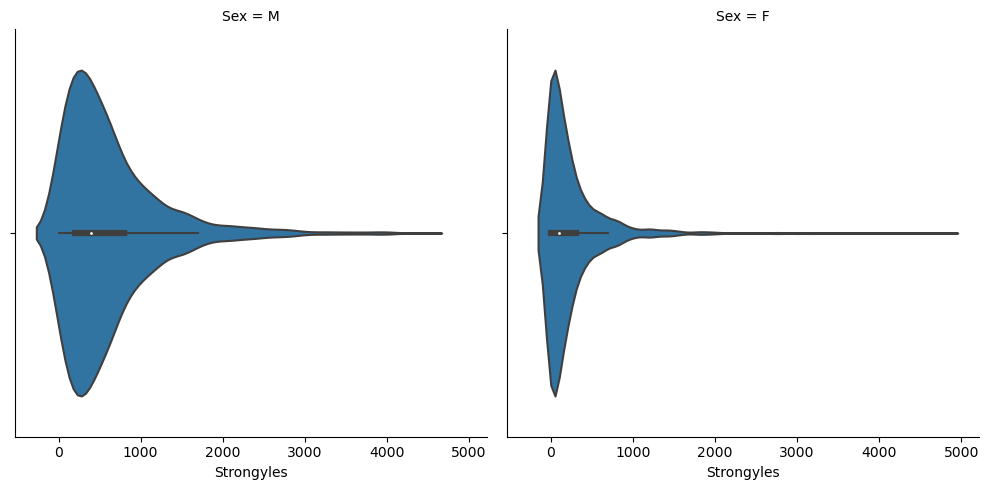

In [75]:
sns.catplot(df, x = 'Strongyles', col ='Sex', kind = 'violin')

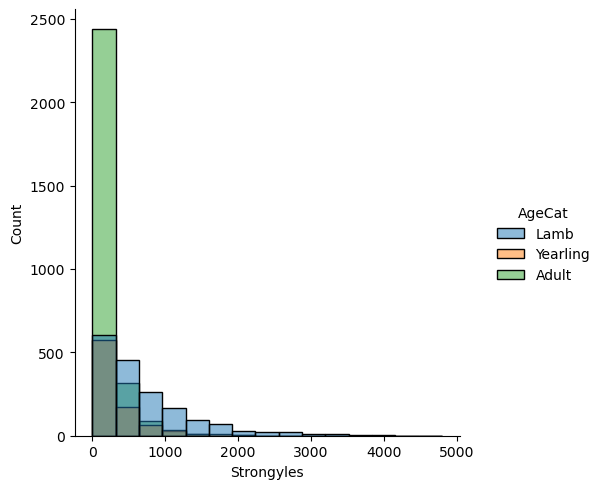

In [77]:
sns.displot(df, x='Strongyles', hue='AgeCat', bins = 15)

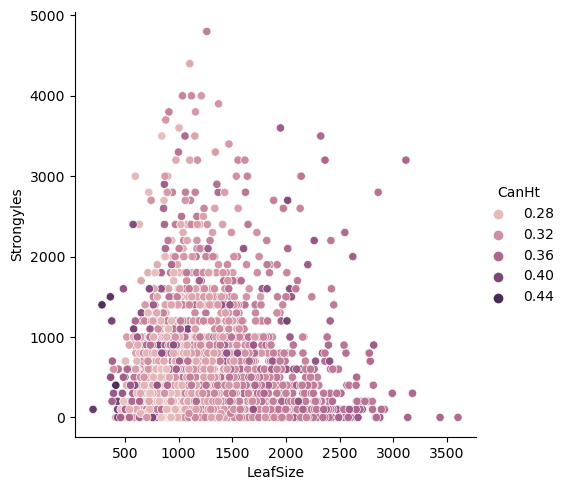

In [68]:
sns.relplot(df, y = 'Strongyles', x = 'LeafSize', hue='CanHt')
